In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import requests
import matplotlib.pyplot as plt
from client import engine
from greenLight import greenLight
from terminalLogic import Algo
import schedule
plt.rcParams['figure.figsize'] = [16.0, 6.0]
%matplotlib inline


===running all protocols===


C:\Users\tbrid\Desktop\terminalLogic\code\terminalLogic.py:456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open']=df['open'].shift(1)
C:\Users\tbrid\Desktop\terminalLogic\code\terminalLogic.py:457: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high']=df['high'].shift(1)
C:\Users\tbrid\Desktop\terminalLogic\code\terminalLogic.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

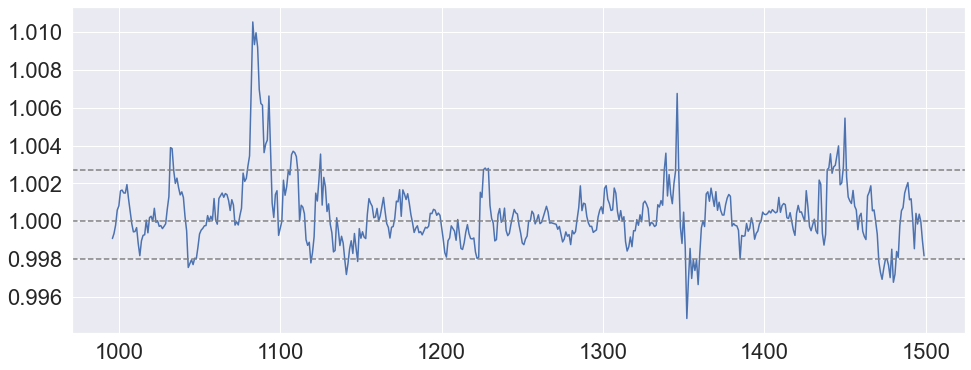

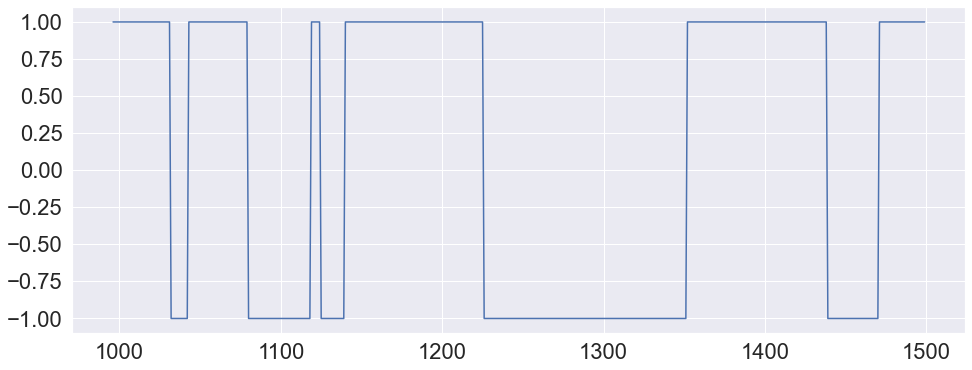

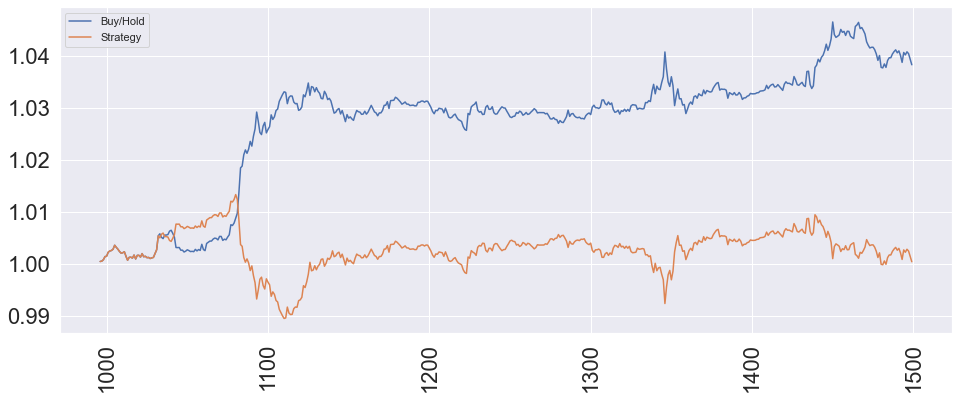

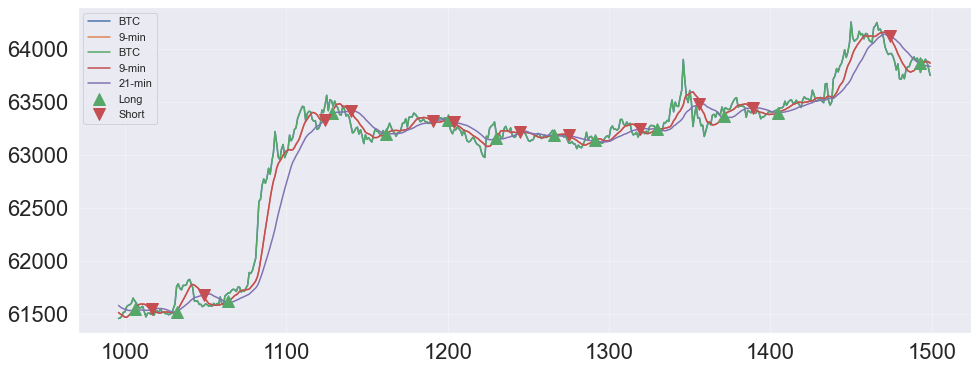

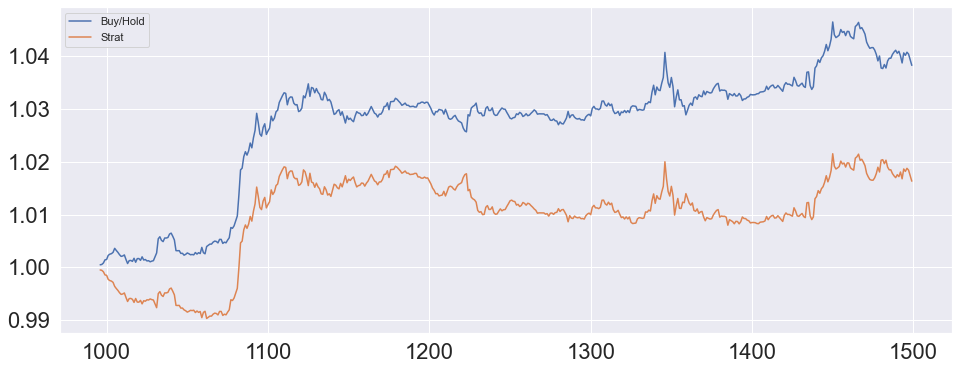

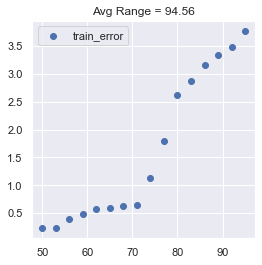

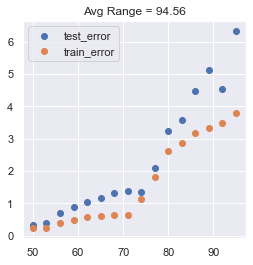

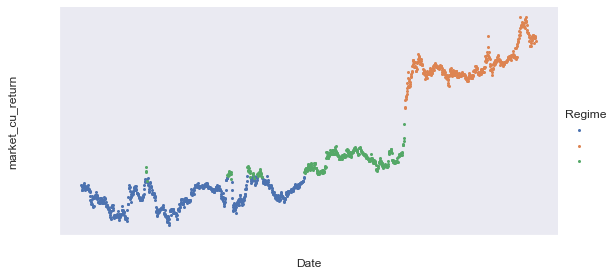

Mean for regime 0:  60958.59789365081
Co-Variancefor regime 0:  39107.63775114877
Mean for regime 1:  63379.75782561301
Co-Variancefor regime 1:  86781.93837146623
Mean for regime 2:  61600.287748257106
Co-Variancefor regime 2:  23944.661767767502


C:\Users\tbrid\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


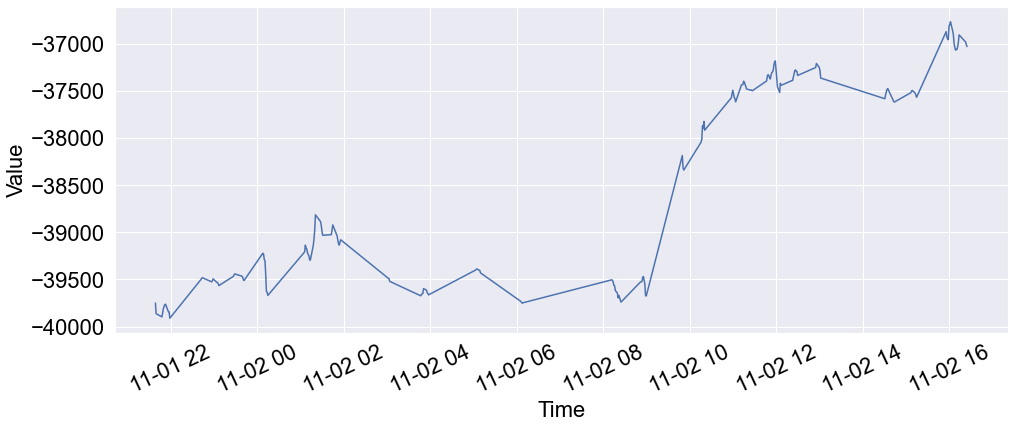

NameError: name 'j' is not defined

In [2]:
while True:
    print('===running all protocols===')
    data = engine.getData('BTCPERP')
    df = Algo.fullstate(data, data)
    df.dropna(inplace=True)
    algo = df
    algo['just_time'] = algo['time'].dt.date
    table = algo.tail(20)
    table.to_json('../web/templates/table.json', orient='records')
    a = Algo.plot_percentiles(algo)
    b = Algo.plot_positionR(algo)
    c = Algo.market_returnsR(algo)
    d = Algo.nineM(algo)
    e = Algo.plot_positionT(algo)
    f = Algo.plot_gainzT(algo)
    g = Algo.regime(algo)
    h = Algo.folio(algo)
    i = Algo.folioDB()
    j = Algo.dualPlot(algo)
    time.sleep(60)

In [ ]:
data = engine.getData('BTCPERP')
df = Algo.fullstate(data, data)
df.dropna(inplace=True)
algo = df
algo['just_time'] = algo['time'].dt.date
self = algo
self=self.dropna()
self['rangeSign'] = np.where(self['range_returns'] < 0, 'neg','pos')
self['trendSign'] = np.where(self['trend_returns'] < 0, 'neg','pos')

#consecutive groups
self['rangeSeries'] = self['rangeSign'].ne(self['rangeSign'].shift()).cumsum()
self['trendSeries'] = self['trendSign'].ne(self['trendSign'].shift()).cumsum()

#removed groups with length more like 2
df = self[self['rangeSeries'].map(self['rangeSeries'].value_counts()).gt(2)]
df = self[self['trendSeries'].map(self['trendSeries'].value_counts()).gt(2)]

#tested if order `pos-neg` of groups, if not removed groups
m1 = df['rangeSign'].eq('pos') & df['rangeSign'].shift(-1).eq('neg')
m2 = df['rangeSign'].eq('neg') & df['rangeSign'].shift().eq('pos')
m3 = df['trendSign'].eq('pos') & df['trendSign'].shift(-1).eq('neg')
m4 = df['trendSign'].eq('neg') & df['trendSign'].shift().eq('pos')
groupsR = df.loc[m1 | m2, 'rangeSeries']
df = df[df['rangeSeries'].isin(groupsR)].copy()
df['rangePairs'] = (df['rangeSign'].ne(df['rangeSign'].shift()) & df['rangeSign'].eq('pos')).cumsum()
groupsT = df.loc[m3 | m4, 'trendSeries']
df = df[df['trendSeries'].isin(groupsT)].copy()
df['trendPairs'] = (df['trendSign'].ne(df['trendSign'].shift()) & df['trendSign'].eq('pos')).cumsum()
rangeTradeCounts = df['rangeSeries'].nunique()
trendTradeCounts = df['trendSeries'].nunique()
totalTrades = rangeTradeCounts + trendTradeCounts
df['just_date'] = df['time'].dt.date
df['just_date']
# Set initial capital
initial_capital = float(22000.0)
# Create df positions
positions = pd.DataFrame(index=df.time.index).fillna(0.0)
# Buy 2 BTC
positions['BTCPERP'] = 1*df['signal']
# Initilize portfolio w value owned
portfolio = positions.multiply(df['close'], axis=0)
# Store diff in shares owned
pos_diff = positions.diff()
# Add 'holdings' to portfolio
portfolio['holdings'] = (positions.multiply(df['close'], axis=0)).sum(axis=1)
# Add 'cash' to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['close'], axis=0)).sum(axis=1).cumsum()
# Add 'total' to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
# Add 'returns' to portfolio
portfolio['returns'] = portfolio['total'].pct_change()
portfolio['time'] = df['time']
p = portfolio[-1:]
p.drop(columns=['time'], inplace=True)
p = p.reset_index(drop=True)
p.to_json('../web/templates/portfolio2.json', orient='records')
p